# Libs

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

# Auxiliary function

In [2]:
#supressess scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# hide warnings 
warnings.filterwarnings('ignore')


pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load Data

In [3]:
path = 'kc_house_data.csv'
data = pd.read_csv('kc_house_data.csv')

# Data exploration and cleaning

## ___                    Overview

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


In [5]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.000,4580301520.865,2876565571.312,1000102.000,2123049194.000,3904930410.000,7308900445.000,9900000190.000
price,21613.000,540088.142,367127.196,75000.000,321950.000,450000.000,645000.000,7700000.000
bedrooms,21613.000,3.371,0.930,0.000,3.000,3.000,4.000,33.000
bathrooms,21613.000,2.115,0.770,0.000,1.750,2.250,2.500,8.000
sqft_living,21613.000,2079.900,918.441,290.000,1427.000,1910.000,2550.000,13540.000
sqft_lot,21613.000,15106.968,41420.512,520.000,5040.000,7618.000,10688.000,1651359.000
floors,21613.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21613.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21613.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21613.000,3.409,0.651,1.000,3.000,3.000,4.000,5.000


## ____Remove outliers

In [8]:
data[data['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.000,33,1.750,1620,6000,1.000,0,0,...,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [9]:
data = data.drop(data[data['bedrooms']==33].index)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


## ____Remove duplicate

In [10]:
print(f'duplicate ids in the dataset: {data[data["id"].duplicated()]["id"].count()}')
#show all duplicates
data[data['id'].duplicated(keep=False)].sort_values('id')

duplicate ids in the dataset: 177


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,20150422T000000,300000.000,6,3.000,2400,9373,2.000,0,0,...,7,2400,0,1991,0,98002,47.326,-122.214,2060,7316
2496,1000102,20140916T000000,280000.000,6,3.000,2400,9373,2.000,0,0,...,7,2400,0,1991,0,98002,47.326,-122.214,2060,7316
16814,7200179,20141016T000000,150000.000,2,1.000,840,12750,1.000,0,0,...,6,840,0,1925,0,98055,47.484,-122.211,1480,6969
16815,7200179,20150424T000000,175000.000,2,1.000,840,12750,1.000,0,0,...,6,840,0,1925,0,98055,47.484,-122.211,1480,6969
11434,109200390,20141020T000000,250000.000,3,1.750,1480,3900,1.000,0,0,...,7,1480,0,1980,0,98023,47.298,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,20140627T000000,260000.000,2,1.000,700,4800,1.000,0,0,...,7,700,0,1922,0,98122,47.615,-122.300,1440,4800
15200,9834200305,20150210T000000,615000.000,3,1.000,1790,3876,1.500,0,0,...,7,1090,700,1904,0,98144,47.575,-122.288,1360,4080
15199,9834200305,20140716T000000,350000.000,3,1.000,1790,3876,1.500,0,0,...,7,1090,700,1904,0,98144,47.575,-122.288,1360,4080
1085,9834200885,20140717T000000,360000.000,4,2.500,2080,4080,1.000,0,0,...,7,1040,1040,1962,0,98144,47.572,-122.290,1340,4080


In [11]:
data = data.drop_duplicates(subset='id',keep = 'last').reset_index(drop = True)

# Data Transformations and Feature Engineering

In [12]:
# transformation to datetime type
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [13]:
#new collumn price_sqft( price/ sqft_lot)
data['price_sqft'] = data.apply(lambda row : float(row['price']/row['sqft_lot']), axis=1)

In [14]:
#new collumns month,year and seasons
#seasons 
Spring = [3,4,5 ]
Summer = [6,7,8]
Fall = [9,10,11]
Winter = [12,1,2]
data['month'] = data.apply((lambda row : row['date'].month),axis = 1)
data['year'] = data.apply((lambda row : row['date'].year),axis = 1)
data['season'] = data.apply((lambda row : 'Spring' if row['month'] in Spring else
                                          'Summer' if row['month'] in Summer else
                                          'Fall' if row['month'] in Fall else
                                          'Winter')  ,axis = 1)

In [15]:
#median price per zipcode considering the season and waterfront
median = data[['price_sqft', 'zipcode','waterfront','season']].groupby(['zipcode','season','waterfront']).median().reset_index()
median.columns =['zipcode','season','waterfront','mprice_zip']
median

,zipcode,season,waterfront,mprice_zip
0,98001,Fall,0,25.529
1,98001,Spring,0,28.772
2,98001,Summer,0,23.973
3,98001,Winter,0,30.235
4,98002,Fall,0,31.833
...,...,...,...,...
350,98199,Fall,0,132.383
351,98199,Fall,1,64.409
352,98199,Spring,0,147.104
353,98199,Summer,0,148.315


In [16]:
data = pd.merge(data,median, on = ['zipcode','season','waterfront'],  how ='inner')

In [17]:
# mprice_zip is the median price per zipcode considering the season and waterfront
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,month,year,season,mprice_zip
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,98178,47.511,-122.257,1340,5650,39.274,10,2014,Fall,39.351
1,2976800796,2014-09-25,236000.000,3,1.000,1300,5898,1.000,0,0,...,98178,47.505,-122.255,1320,7619,40.014,9,2014,Fall,39.351
2,1180003090,2014-09-06,190000.000,2,1.000,630,6000,1.000,0,0,...,98178,47.497,-122.221,1470,6840,31.667,9,2014,Fall,39.351
3,2171400197,2014-09-18,350000.000,5,3.000,2520,5500,1.000,0,0,...,98178,47.494,-122.255,1700,8000,63.636,9,2014,Fall,39.351
4,1180002378,2014-09-26,299000.000,4,2.500,1950,3000,2.000,0,0,...,98178,47.498,-122.226,1170,6000,99.667,9,2014,Fall,39.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,3222049087,2015-04-22,570000.000,1,1.000,720,7540,1.000,1,4,...,98198,47.351,-122.323,1120,9736,75.597,4,2015,Spring,75.597
21431,1455100355,2014-07-08,1675000.000,3,2.500,3490,8343,2.000,1,4,...,98125,47.727,-122.281,2990,13104,200.767,7,2014,Summer,200.767
21432,9253900408,2015-04-08,1400000.000,3,2.750,3130,19530,1.000,1,4,...,98008,47.590,-122.111,2980,18782,71.685,4,2015,Spring,176.515
21433,8043700105,2015-04-17,2300000.000,4,4.000,4360,8175,2.500,1,4,...,98008,47.572,-122.104,2670,8525,281.346,4,2015,Spring,176.515


# Exploratory Data Analysis

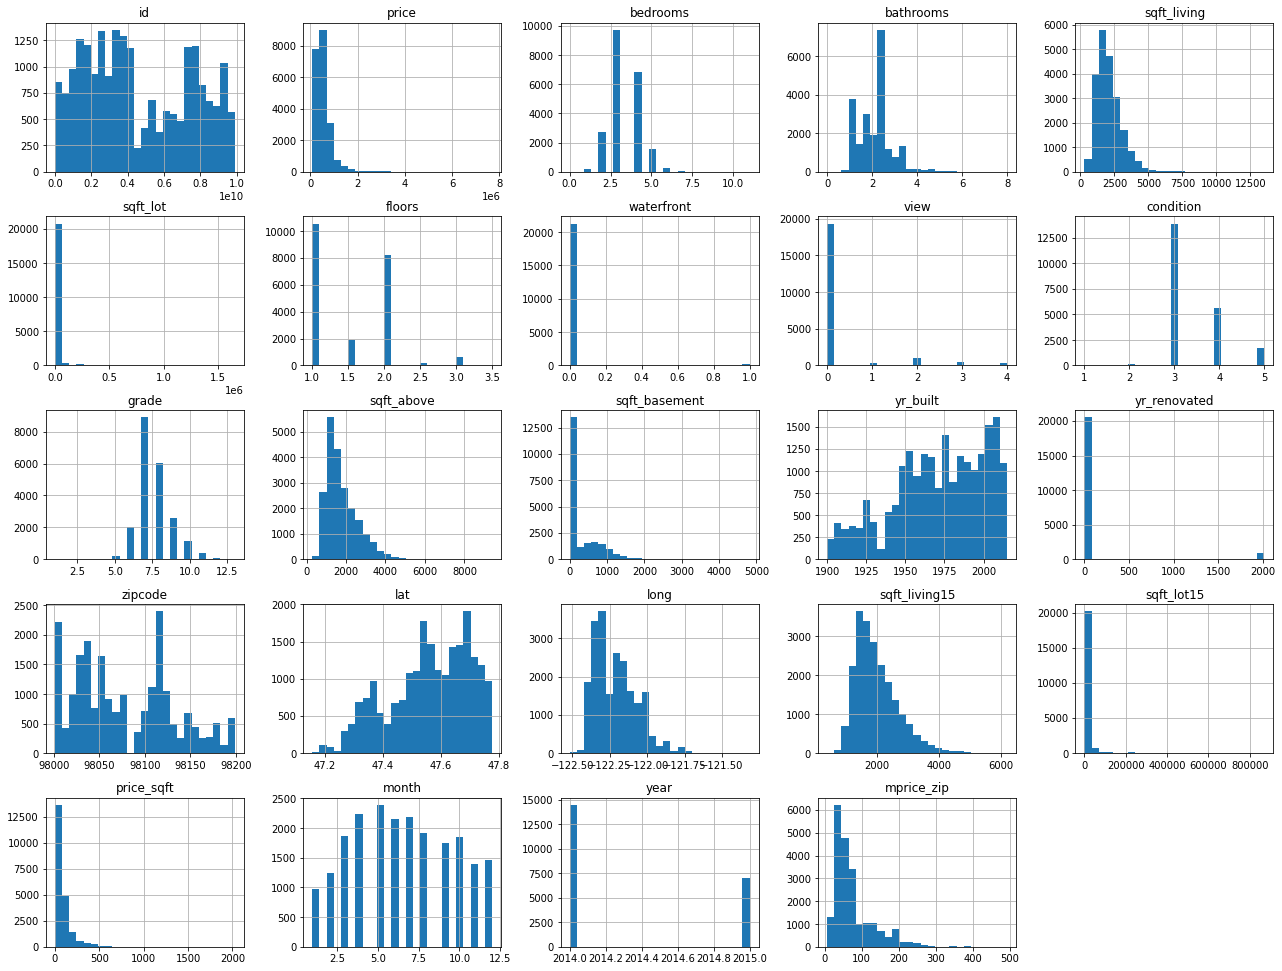

In [18]:
numeric_attributes = data.select_dtypes(include = ['int64', 'float64'])
fig = plt.figure(figsize=(22,17))
ax = fig.gca()
numeric_attributes.hist(ax = ax, bins = 25);

# Insights

## ____Waterfront houses are 30% more expensive.

Houses with waterfront are 37.013% more expensive


,waterfront,price_sqft
0,0,89.034
1,1,121.988


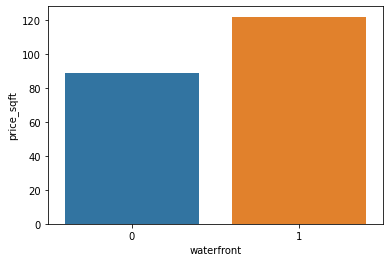

In [37]:
df = data[['waterfront', 'price_sqft']].groupby('waterfront').mean().reset_index()
sns.barplot(x = df.waterfront, y = df.price_sqft)
print(f'Houses with waterfront are {(121.988/89.034-1)*100:.3f}% more expensive')
df


1.3594132578565492

## ____ Houses in good condition (3 up) are 30% more expensive 
## than houses in bad condidtion (1-2)

<AxesSubplot:xlabel='condition', ylabel='price'>

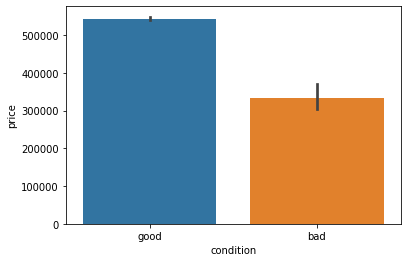

In [20]:
condition_price = data[['price', 'condition']]
condition_price['condition'] = condition_price['condition'].apply(lambda x : 'good' if x > 2 else 'bad')
sns.barplot(x = condition_price['condition'] , y = condition_price['price'] )

# Business Questions

## ____which house to buy?

In [21]:
# Targets are homes with  an average price 30% below the average zipcode price and  condition above 3
data['action'] =  data.apply( lambda row : 'Buy' if (row['price_sqft'] < 0.7 * row['mprice_zip']) & 
                                                    (row['condition'] >= 3) else 'Not', axis=1) 

In [22]:
houses_buy = data[data['action'] == 'Buy'][['id','sqft_lot', 'price', 'price_sqft', 'mprice_zip','condition','waterfront']]
houses_buy

,id,sqft_lot,price,price_sqft,mprice_zip,condition,waterfront
7,3810000202,11800,251700.000,21.331,39.351,3,0
8,4058802105,6776,150000.000,22.137,39.351,3,0
12,7813200115,6426,100000.000,15.562,39.351,3,0
15,399000195,7500,200000.000,26.667,39.351,3,0
20,8068000305,10000,241000.000,24.100,39.351,3,0
...,...,...,...,...,...,...,...
21407,2013802030,53882,357000.000,6.626,21.532,3,1
21416,9412400220,18200,1612500.000,88.599,196.473,3,1
21424,6329000185,23361,540000.000,23.115,70.619,3,1
21427,7110000068,54160,975000.000,18.002,26.176,3,1


## __Total amount invested

In [23]:
total_amount = houses_buy['price'].sum()
print(f'Total amount invested is ${total_amount}')


Total amount invested is $2367054900.0


## __How much to sell?


In [24]:
houses_buy['price_sell'] = data.apply(lambda row : round(row['sqft_lot'] * row['mprice_zip'], 2),axis = 1)

In [25]:
houses_buy

,id,sqft_lot,price,price_sqft,mprice_zip,condition,waterfront,price_sell
7,3810000202,11800,251700.000,21.331,39.351,3,0,464340.870
8,4058802105,6776,150000.000,22.137,39.351,3,0,266641.840
12,7813200115,6426,100000.000,15.562,39.351,3,0,252869.020
15,399000195,7500,200000.000,26.667,39.351,3,0,295131.910
20,8068000305,10000,241000.000,24.100,39.351,3,0,393509.220
...,...,...,...,...,...,...,...,...
21407,2013802030,53882,357000.000,6.626,21.532,3,1,1160162.100
21416,9412400220,18200,1612500.000,88.599,196.473,3,1,3575815.220
21424,6329000185,23361,540000.000,23.115,70.619,3,1,1649722.750
21427,7110000068,54160,975000.000,18.002,26.176,3,1,1417700.600


## __Profit

In [27]:
houses_buy['profit'] = houses_buy.apply(lambda row : row['price_sell'] - row['price'], axis = 1)

In [29]:
houses_buy['profit_percent'] = houses_buy.apply(lambda row : ((row['price_sell'] / row['price']-1)*100), axis = 1)

In [30]:
houses_buy.reset_index(drop = True)
total_sell = houses_buy['price_sell'].sum()
total_profit = houses_buy['profit'].sum()
mean_percent_profit = houses_buy['profit_percent'].mean()
total_buy_houses = houses_buy.shape[0]


In [31]:
print(f'{total_buy_houses} houses were selected for purchase. \n'
     f'Total amount invested is ${total_amount:.2f}\n'
     f'Total amount sell is ${total_sell:.2f}\n'
     f'Total profit is ${total_profit:.2f}\n'
     f'Mean profit per house is {mean_percent_profit:.3f}%\n'
     )
    
      

4923 houses were selected for purchase. 
Total amount invested is $2367054900.00
Total amount sell is $8452463171.40
Total profit is $6085408271.40
Mean profit per house is 239.726%



In [32]:
houses_buy.sort_values('profit_percent', ascending= True).reset_index(drop = True)

,id,sqft_lot,price,price_sqft,mprice_zip,condition,waterfront,price_sell,profit,profit_percent
0,7657600195,7260,199950.000,27.541,39.351,3,0,285687.690,85737.690,42.880
1,5467910190,13095,325000.000,24.819,35.470,4,0,464473.900,139473.900,42.915
2,1735800050,6825,142500.000,20.879,29.841,4,0,203663.190,61163.190,42.922
3,7129303180,6150,310000.000,50.407,72.056,5,0,443141.670,133141.670,42.949
4,130000175,8197,655000.000,79.907,114.231,3,0,936349.620,281349.620,42.954
...,...,...,...,...,...,...,...,...,...,...
4918,1525069021,214315,400000.000,1.866,94.288,3,0,20207433.400,19807433.400,4951.858
4919,1549500370,306848,210000.000,0.684,35.433,3,0,10872486.920,10662486.920,5077.375
4920,1222069089,533610,375000.000,0.703,48.883,5,0,26084718.200,25709718.200,6855.925
4921,123079023,365904,356000.000,0.973,84.071,3,0,30761740.680,30405740.680,8540.938
